# Monte Carlo method estimation of pi

A basic Monte Carlo method can be used to estimate $\pi$. Note that the ratio of the area of a circle ($\pi r^2$) to the area of a square ($4r^2$) within which that circle is inscribed is,

\begin{align*}
    \frac{\pi r^2}{4r^2} = \frac{\pi}{4}.
\end{align*}

Then, place dots randomly within the unit square, with equal probability of any given point being chosen. The probability that a dot is within the circle given by the equation $x^2 + y^2 = r^2$ is thus,

\begin{align*}
    P = \frac{C}{C+S}
\end{align*}

where $C$ is the number of dots which land within the circle, and $S$ the number which land in the square. As $C+S \to \inf$, we have that 

\begin{align*}
    &\frac{\pi}{4} = P ,\\
    &\pi = 4P
\end{align*}

and so by estimating the probability P for a finite $C+S$ we can estimate $\pi$.


In [862]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rcParams
import numpy as np
import math
import random

rcParams.update(matplotlib.rcParamsDefault)

# allow interactive plots, animated gifs, etc.
%matplotlib notebook

# initialising variables which will contain the number of points inside and outside of the circle.
points_inside = 0
points_outside = 0

i = 10000 # number of desired iterations.
n = 0 # iteration count.

# initalising empty np array for pi_estimates.
pi_estimates = np.empty([0])

# initialising empty np arrays for random points, for use in animation.
x_rands = np.empty([0])
y_rands = np.empty([0])

# initialising empty np arrays for points which are inside and outside the circle.
inside_x_rands = np.empty([0])
inside_y_rands = np.empty([0])

outside_x_rands = np.empty([0])
outside_y_rands = np.empty([0])

while n < i+1:
    # generate random (x, y) coordinate between (0, 0) and (1, 1) ie. a unit square.
    x_rand = random.random()
    y_rand = random.random()
    
    # storing above random points for later animation.
    x_rands = np.append(x_rands, x_rand)
    y_rands = np.append(y_rands, y_rand)
    
    # check whether random point is within the unit circle which inscribes the unit square
    # and add it to respective array for later animation.
    if (x_rand**2 + y_rand**2 <= 1):
        points_inside += 1
        inside_x_rands = np.append(inside_x_rands, x_rand)
        inside_y_rands = np.append(inside_y_rands, y_rand)
    else:
        points_outside += 1
        outside_x_rands = np.append(outside_x_rands, x_rand)
        outside_y_rands = np.append(outside_y_rands, y_rand)
    
    # calculate probability random point is within circle given trials run thus far.
    inside_probability = (points_inside)/(points_inside + points_outside)
    pi_estimate = 4 * inside_probability
    
    # add pi estimate to array for later plotting.
    pi_estimates = np.append(pi_estimates, pi_estimate)
    
    n += 1

# generate list of colours, red if a point is in the circle, black if it is outside. Used to colour scatter plots.
col = np.where(x_rands**2 + y_rands**2 <= 1, "red", "black")

# print some useful information.
print("Number of points sampled:", i)
print("Pi estimate:", pi_estimate)
print("Pi accurate to 15 decimals:", np.pi)

##############################################################
## ----- PLOT PI ESTIMATE AGAINST NUMBER OF ITERATIONS -----##
##############################################################

def plot_estimate_against_iterations():
    
    x = np.linspace(1, i+1, i+1)
    y = pi_estimates
    
    # to avoid using the fig, ax method of plotting through matplotlib, we need to call plt.close() when in interactive mode
    # to avoid overwriting the currently active plot.
    plt.close()
    plt.axhline(y = np.pi, color = "red")
    plt.grid(True, linestyle = "-")
    plt.xlabel("Number of points sampled")
    plt.ylabel(r"Estimate of $\mathrm{\pi}$")
    plt.title(r"Estimate of $\mathrm{\pi}$ compared with true value as points sampled increases")
    plt.ylim(2.6, 4.1)
    plt.xlim(-i/10, i)
    plt.scatter(x, y, color = "black", s = 0.8, zorder = 5)
    
    plt.savefig("monte_carlo_pi_estimate_against_i")

################################################
## ----- ANIMATE EACH POINT BEING CHOSEN -----##
################################################

# generate an animation of each point being chosen and plotted, where:
# n is the number of frames in the final output (note that as n increases so does computing time).
# delay is the time in milliseconds during which the animation freezes on the final frame (note this
# only works within the interactive plot, not the outputted gif. Additionally, this may fail if time_between_frames is too low).
# time_between_frames is the time in milliseconds between frame updates.

# note that the interactive animation slows down as frame updates increase for performance reasons. The outputted gif
# is unaffected.
def generate_anim(multiple_points_per_update = True, n = 10, delay = 5000, time_between_frames = 500):
    
    plt.close()
    fig = plt.figure()
    
    # function which is called at the beginning of the animation.
    def init_anim():
        
        fig.clear()

        plt.axis("square")
        plt.xlim(0, 1)
        plt.ylim(0, 1)

    # function which is looped through by the FuncAnimation function; anything that changes from
    # frame to frame is placed here.
    def update_anim(k):
        
        # cast float k to int with a ceiling function.
        k = math.ceil(k)
        
        plt.cla()
        plt.axis("square")
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f"After {(k)} points, we estimate pi = {np.round(pi_estimates[k], 4)}.")
            
        plt.scatter(x_rands[:k], y_rands[:k], color = col[:k], s = 2)
            
        print("Frame:", k)
        print("Points plotted:", x_rands[:k].size)

    # note that the repeat delay only works in the interactive inline graph, not the saved gif.
    anim = FuncAnimation(fig, update_anim, frames = np.arange(0, i+1, i/n),
                         init_func = init_anim, interval = time_between_frames, repeat_delay = delay)
    anim.save("monte_carlo_pi_animation.gif", writer = "imagemagick")

############################################   
## ----- PLOT FINAL ANIMATION FRAME ----- ##
############################################

def plot_final_frame():
    
    # to avoid using the fig, ax method of plotting through matplotlib, we need to call plt.close() when in interactive mode
    # to avoid overwriting the currently active plot.
    plt.close()
    plt.axis("square")
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.title(f"After {(i)} points, we estimate pi = {np.round(pi_estimates[-1], 4)}.")
    
    plt.scatter(x_rands, y_rands, color = col, s = 2)
    plt.savefig("monte_carlo_pi_final_frame")

Number of points sampled: 10000
Pi estimate: 3.1412858714128586
Pi accurate to 15 decimals: 3.141592653589793


<IPython.core.display.Javascript object>


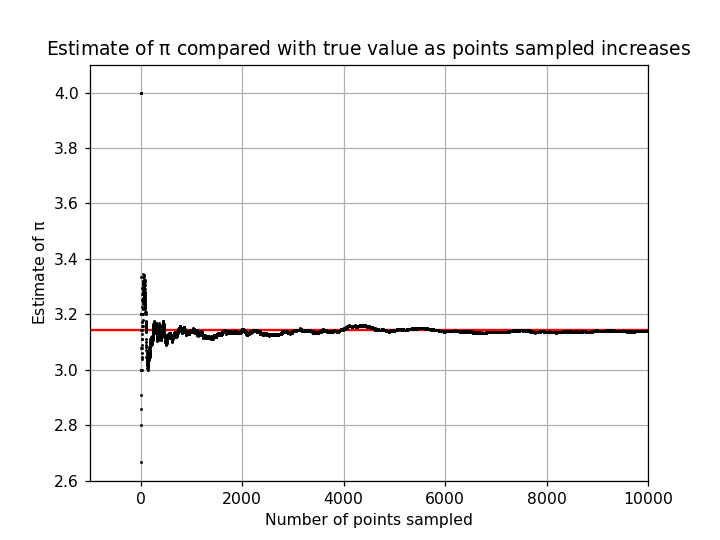

In [863]:
plot_estimate_against_iterations()

<IPython.core.display.Javascript object>


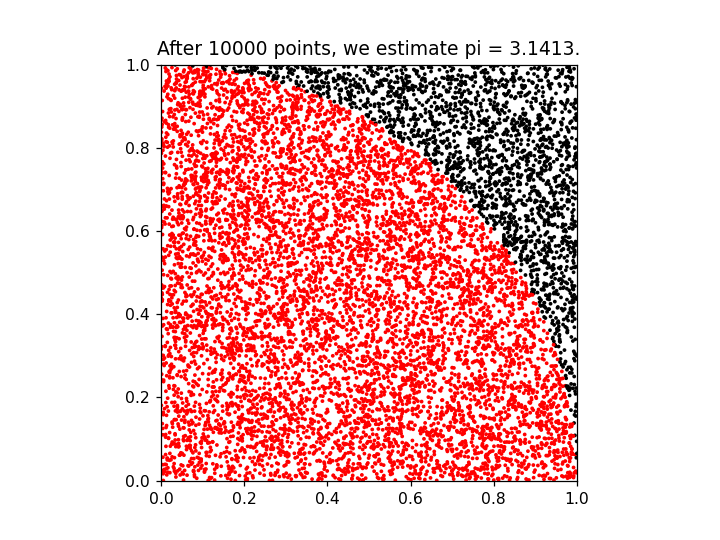

In [864]:
plot_final_frame()

<IPython.core.display.Javascript object>


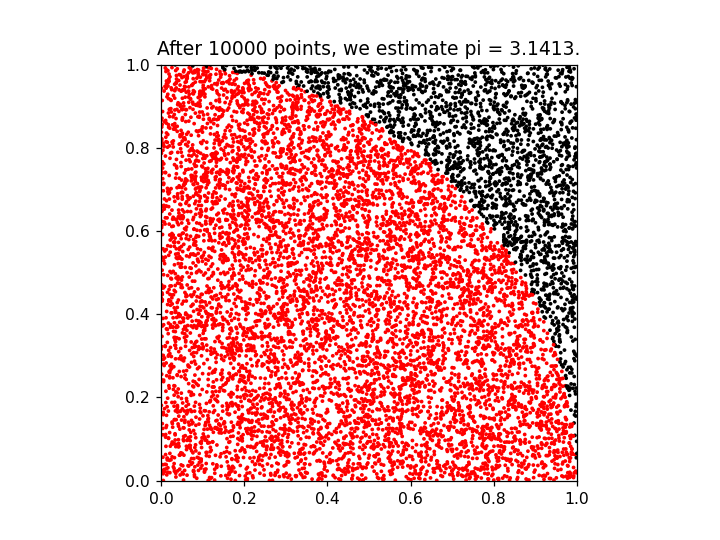

Frame: 0
Points plotted: 0
Frame: 200
Points plotted: 200
Frame: 400
Points plotted: 400
Frame: 600
Points plotted: 600
Frame: 800
Points plotted: 800
Frame: 1000
Points plotted: 1000
Frame: 1200
Points plotted: 1200
Frame: 1400
Points plotted: 1400
Frame: 1600
Points plotted: 1600
Frame: 1800
Points plotted: 1800
Frame: 2000
Points plotted: 2000
Frame: 2200
Points plotted: 2200
Frame: 2400
Points plotted: 2400
Frame: 2600
Points plotted: 2600
Frame: 2800
Points plotted: 2800
Frame: 3000
Points plotted: 3000
Frame: 3200
Points plotted: 3200
Frame: 3400
Points plotted: 3400
Frame: 3600
Points plotted: 3600
Frame: 3800
Points plotted: 3800
Frame: 4000
Points plotted: 4000
Frame: 4200
Points plotted: 4200
Frame: 4400
Points plotted: 4400
Frame: 4600
Points plotted: 4600
Frame: 4800
Points plotted: 4800
Frame: 5000
Points plotted: 5000
Frame: 5200
Points plotted: 5200
Frame: 5400
Points plotted: 5400
Frame: 5600
Points plotted: 5600
Frame: 5800
Points plotted: 5800
Frame: 6000
Points plott

In [867]:
generate_anim(n = 50)